In [1]:
import sys
#sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Evaluator
from supervised import get_test_dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/Users/alessiogandelli/dev/uni/topic-modeling-eval/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessiogandelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessiogandelli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alessiogandelli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Prepare Datasets 
The supervised dataset is a collection of tweets that have been extracted according to their hashtag, in the first exmaple we have bitcoin, ukrainian war, formula1, trump and climatechange. The tweets are in a folder and each topic should be in a jsonl file with the name of the topic. The jsonl data have been ectracted using twarc2.

Then two version of the same dataset have been created, one with the original tweets and one with the tweets without the hashtags.

In [2]:
df_simple, df_simple_no_hash = get_test_dataset('/Users/alessiogandelli/dev/uni/topic-modeling-eval/data/simple_supervised/')
df_politics, df_politics_no_hash = get_test_dataset('/Users/alessiogandelli/dev/uni/topic-modeling-eval/data/politics_supervised/')


getting dataset
getting dataset


The evaluator class has a self explanatory name, it is used to evaluate the results of the models. takes in input a dataframe and the name of the model to use to evaluate it. Internally it creates the model and run the evaluation. we can access the results using the accuracy attribute (gsdmm.accuracy for example)

In [3]:
gsdmm = Evaluator(df_simple, 'GSDMM')
climatebert = Evaluator(df_simple, 'climatebert/distilroberta-base-climate-f')
tweetclass = Evaluator(df_simple, 'louisbetsch/tweetclassification-bf-model')
nmf = Evaluator(df_simple, 'NMF')
bert_mini = Evaluator(df_simple, 'all-MiniLM-L6-v2')
bert_mpnet = Evaluator(df_simple, 'all-mpnet-base-v2')
openai_eval = Evaluator(df_simple, 'openai')

evaluate GSDMM
model  GSDMM
iteration  0
In stage 0: transferred 742 clusters with 5 clusters populated
In stage 1: transferred 317 clusters with 5 clusters populated
In stage 2: transferred 141 clusters with 5 clusters populated
In stage 3: transferred 116 clusters with 5 clusters populated
In stage 4: transferred 63 clusters with 5 clusters populated
In stage 5: transferred 60 clusters with 5 clusters populated
In stage 6: transferred 48 clusters with 5 clusters populated
In stage 7: transferred 61 clusters with 5 clusters populated
In stage 8: transferred 56 clusters with 5 clusters populated
In stage 9: transferred 51 clusters with 5 clusters populated
In stage 10: transferred 53 clusters with 5 clusters populated
In stage 11: transferred 71 clusters with 5 clusters populated
In stage 12: transferred 79 clusters with 5 clusters populated
In stage 13: transferred 91 clusters with 5 clusters populated
In stage 14: transferred 71 clusters with 5 clusters populated
In stage 15: transfe

No sentence-transformers model found with name /Users/alessiogandelli/.cache/torch/sentence_transformers/climatebert_distilroberta-base-climate-f. Creating a new one with MEAN pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at /Users/alessiogandelli/.cache/torch/sentence_transformers/climatebert_distilroberta-base-climate-f and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


iteration  0
fitting bertopic model
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
accuracy  {'min_topic_share': 0.52, 'btc': 0.1, 'climatechange': 0.6, 'war': 0.69, 'trump_stormy': 0.845, 'formula1': 0.8703071672354948}
evaluate louisbetsch/tweetclassification-bf-model
model  bertopic
embeddings with bertopic
iteration  0
fitting bertopic model
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
accuracy  {'min_topic_share': 0.4, 'btc': 0.35, 'climatechange': 0.805, 'war': 0.455, 'trump_stormy': 0.405, 'formula1': 0.3037542662116041}
evaluate NMF
model  NMF
iteration  0
fitting NMF model, max_df =  0.95  min_df =  3  ngram_range =  (1, 2)
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
accuracy  {'min_topic_share': 0.58, 'btc': 0.49, 'climatechange': 0.68, 'war': 0.98, 'trump_stormy': 0.995, 'formula1': 1.0}
evaluate all-MiniLM-L6-v2
model  bertopic
embeddings with bertopi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


iteration  0
fitting bertopic model
accuracy  {'min_topic_share': 0.95, 'btc': 0.995, 'climatechange': 0.97, 'war': 0.98, 'trump_stormy': 0.985, 'formula1': 0.9829351535836177}


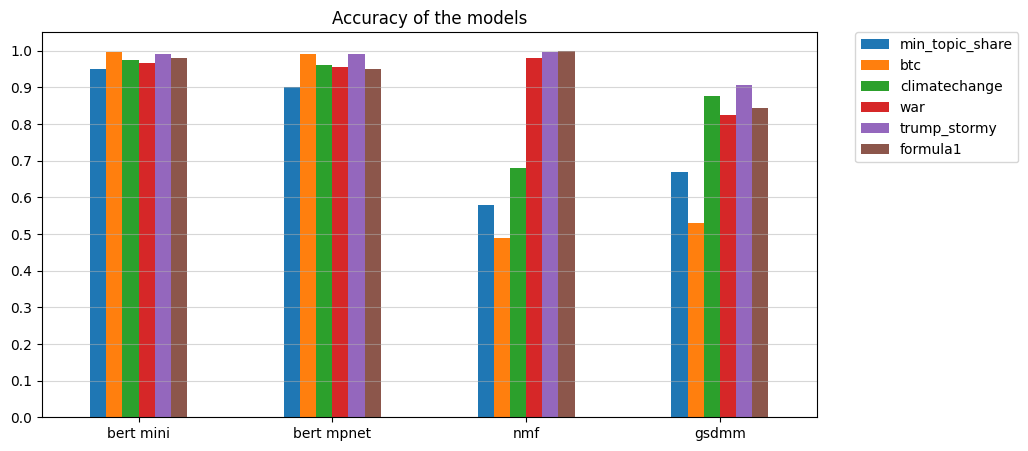

In [4]:
models = {'bert mini': bert_mini.accuracy[0]['accuracy'],'bert mpnet': bert_mpnet.accuracy[0]['accuracy'], 'nmf': nmf.accuracy[0]['accuracy'], 'gsdmm': gsdmm.accuracy[0]['accuracy']}
Evaluator.compare_models(models)